# 1. Import packages, downloading and editing datasets

In [19]:
import pandas as pd
import numpy as np
import lxml
import plotly.express as px
import requests
import statsmodels.api as sm

import warnings
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=[FutureWarning])
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

Installing dark mode for graphs

In [20]:
import plotly.io as pio
import datetime

# Get the current hour of the day
current_hour = datetime.datetime.now().hour

# Check if it's evening or nighttime (e.g., after 6 PM or before 6 AM)
if current_hour >= 18 or current_hour < 6:
    template = 'plotly_dark'
else:
    template = 'plotly_white'
pio.templates.default = template

### Concatenating test result for all months

In [21]:
# trs = []
# for i in range(1, 13):
#     month = str(i).zfill(2)
#     file_path = fr"D:\IT\Datasets\MOT\MOT testing data results (2024)\test_result_2024{month}.csv"
#     try:
#         tr = pd.read_csv(file_path, on_bad_lines='skip')
# # filtering dataset to have motorcycle only
#         tr = tr.loc[tr['test_class_id']=='2'] 
#         trs.append(tr)
#     except FileNotFoundError:
#         print(f"File not found: {file_name}")
# if trs:
#     moto = pd.concat(trs, ignore_index=True)
#     print("Successfully loaded and combined all files.")
# else:
#     print("No files were loaded.");

In [22]:
# moto.to_csv(r'D:\IT\Datasets\MOT\moto_v1.csv')

continue with saved motorycle dataset

### Concatenating Test Item Datasets for all months

In [23]:
# # we need to get 'test_id' related only to motorcycles
# unique_test_id = tr['test_id'].unique()
# ti_list = []
# for i in range(1, 13):
#     month = str(i).zfill(2)
#     file_path = fr"D:\IT\Datasets\MOT\MOT Testing data failure item (2024)\test_item_2024{month}.csv"
#     try:
#         ti = pd.read_csv(file_path, on_bad_lines='skip')
#         ti = ti.loc[ti['test_id'].isin(unique_test_id)]
#         ti_list.append(ti)
#     except FileNotFoundError:
#         print(f"File not found: {file_name}")
# if ti_list:
#     test_items = pd.concat(ti_list, ignore_index=True)
#     print("Successfully downloaded and combined all files.")
# else:
#     print("No files were loaded.");

saving combined test items dataset to csv

In [24]:
# test_items.to_csv(r"D:\IT\Datasets\MOT\test_items_2024_v1.csv")

continue with completed file

In [25]:
test_result_original = pd.read_csv(r"D:\IT\Datasets\MOT\moto_v1.csv")
test_items_original = pd.read_csv(r"D:\IT\Datasets\MOT\test_items_2024_v1.csv")
item_detail_original = pd.read_csv(r"D:\IT\Datasets\MOT\item_detail.csv", delimiter='|')
item_group_original = pd.read_csv(r"D:\IT\Datasets\MOT\item_group.csv", delimiter='|')
# fuel_types_original = pd.read_csv(r"D:\IT\Datasets\MOT\mdr_fuel_types.csv", delimiter='|')
rfr_location_original = pd.read_csv(r"D:\IT\Datasets\MOT\mdr_rfr_location.csv", delimiter='|')
# test_result_original = pd.read_csv(r"D:\IT\Datasets\MOT\mdr_test_outcome.csv", delimiter='|')
# test_type_original = pd.read_csv(r"D:\IT\Datasets\MOT\mdr_test_type.csv", delimiter='|')

In [26]:
# mt = moto_original.copy()
# ti = test_items_original.copy()
# itde = item_detail_original.copy()
# ig = item_group_original.copy()
# ft = fuel_types_original.copy()
# rfr_loc = rfr_location_original.copy()
# tr = test_result_original.copy()
# tt = test_type_original.copy()

In [27]:
tr = test_result_original.copy()
ti = test_items_original.copy()
itde = item_detail_original.copy()
ig = item_group_original.copy()
# ft = fuel_types_original.copy()
rfr_loc = rfr_location_original.copy()
# tr = test_result_original.copy()
# tt = test_type_original.copy()

In [28]:
test_items_original.head()

,Unnamed: 0,test_id,rfr_id,rfr_type_code,mot_test_rfr_location_type_id,dangerous_mark,completed_date
0,0,939637859,40098,A,9,NaN,2024-01-02T10:03:29.000Z
1,1,939637859,40098,A,9,NaN,2024-01-02T10:03:29.000Z
2,2,589679699,40573,A,1,NaN,2024-01-03T09:32:07.000Z
3,3,589679699,40184,A,7,NaN,2024-01-03T09:32:07.000Z
4,4,589679699,40286,F,1,NaN,2024-01-03T09:32:07.000Z


In [29]:
item_detail_original.head()

,rfr_id,test_class_id,test_item_id,minor_item,rfr_deficiency_category,rfr_desc,rfr_loc_marker,rfr_insp_manual_desc,rfr_advisory_text,test_item_set_section_id
0,4,1,3,Y,Pre-EU Directive,missing,N,an obligatory lamp missing,NaN,1
1,4,2,3,Y,Pre-EU Directive,missing,N,an obligatory lamp missing,NaN,1
2,5,1,3,Y,Pre-EU Directive,damaged and function impaired,N,so damaged or deteriorated that its function i...,damaged but function not impaired,1
3,5,2,3,Y,Pre-EU Directive,damaged and function impaired,N,so damaged or deteriorated that its function i...,damaged but function not impaired,1
4,6,1,3,Y,Pre-EU Directive,deteriorated and function impaired,N,so damaged or deteriorated that its function i...,deteriorated but function not impaired,1


In [30]:
item_group_original.head(20)

,test_item_id,test_class_id,parent_id,test_item_set_section_id,item_name
0,0,1,0,0,Vehicle
1,0,2,0,0,Vehicle
2,0,3,0,0,Vehicle
3,0,4,0,0,Vehicle
4,0,5,0,0,Vehicle
5,0,7,0,0,Vehicle
6,1,1,0,1,Motorcycle lighting and signalling
7,1,2,0,1,Motorcycle lighting and signalling
8,2,1,1,1,Position lamps
9,2,2,1,1,Position lamps


# 2. Dropping columns, duplicates, outliers, changing dtypes

## Test Result Table

In [31]:
tr.head()

,Unnamed: 0,test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,completed_date
0,0,223539015,1391650284,2024-01-19,2,RT,P,30038.0,PL,SUZUKI,SV650,SILVER,PE,645.0,2004-06-01,2024-01-19T15:32:40.000Z
1,1,185745629,1391650284,2024-01-05,2,NT,F,30034.0,PL,SUZUKI,SV650,SILVER,PE,645.0,2004-06-01,2024-01-05T16:24:55.000Z
2,2,1369747855,952515581,2024-01-06,2,NT,P,8566.0,PL,KAWASAKI,ZX 1000 WKF,BLACK,PE,1043.0,2019-07-28,2024-01-06T10:02:07.000Z
3,3,1196826453,1357660184,2024-01-17,2,NT,P,13505.0,TN,PIAGGIO,X7 EVO,BLACK,PE,278.0,2011-04-01,2024-01-17T13:46:45.000Z
4,4,1558025927,917688922,2024-01-24,2,NT,P,38409.0,BH,BMW,R SERIES,GREY,PE,1170.0,2010-09-16,2024-01-24T16:19:28.000Z


dropping columns

In [32]:
# описание почему мы удаляем колонки

In [33]:
tr_unnamed_column = tr.iloc[:,0].name
# drop 'test_class_id' as well as we don't need anymore
tr = tr.drop(columns=[tr_unnamed_column, 'test_class_id', 'colour', 'fuel_type'])
# dropping duplicates on 'test_id' because each separate test for vehicle has own test_id
tr = tr.drop_duplicates(subset=['test_id'], keep='last')

In [34]:
tr.columns

Index(['test_id', 'vehicle_id', 'test_date', 'test_type', 'test_result',
       'test_mileage', 'postcode_area', 'make', 'model', 'cylinder_capacity',
       'first_use_date', 'completed_date'],
      dtype='object')

changing dtype

In [35]:
date_cols = ['test_date', 'first_use_date', 'completed_date']
for col in date_cols:
    tr[col] = pd.to_datetime(tr[col], errors='coerce')
# drop timezone because it's data for UK through dataset
tr['completed_date'] = tr['completed_date'].dt.tz_localize(None)
object_cols = tr.select_dtypes(include='object').columns
tr[object_cols] = tr[object_cols].astype(str)
int_cols = tr.select_dtypes(exclude=['object', 'datetime']).columns
tr[int_cols] = tr[int_cols].astype('Int32')

Checking for incorrect model names, found out Harley-Davidson has many incorrect spellings, model description with make itself, cleaning it

In [36]:
harley = tr.loc[tr['make'].str.contains('HARL')]
harley[['make_copy', 'model_copy']] = harley['make'].str.extract(r'^(HARLE?Y\s?-?DAVID?SON)\s?(.*)$')
harley['make'] = 'HARLEY-DAVIDSON'
lost_model = harley.loc[harley['model_copy'] != '']
harley.loc[lost_model.index, 'model'] = lost_model['model_copy']
harley.drop(columns=['make_copy', 'model_copy'], inplace=True)
tr.loc[harley.index] = harley

According to Wikipedia, 'Indian' and 'Indian Motorcycle' are one brand

In [37]:
tr.loc[tr['make'].str.contains('INDIAN'), 'make'] = 'INDIAN MOTORCYCLE'

#### delete maybe

In [38]:
# # adding simplified 'passed' column with 2 values
# tr['passed'] = tr['test_result'].isin(['P', 'PRS'])

As we have discrepancy in data, in some cases first test is labeled as "RT"(Re-Test), we don't know exactly, whether first test failed or took place last year, i would refer to each first test as a first one

In [39]:
# # first test index
# fti = tr.sort_values(by=['vehicle_id', 'completed_date'], ascending=True).groupby('vehicle_id').nth(0).index
# tr.loc[fti, 'test_type'] = 'NT'
# tr.loc[~tr.index.isin(fti),'test_type'] = 'RT'

#### continue

As 'test_date' always equals 'completed_date', i.e. each test was completed within the day we don't need 'test_date' column

In [40]:
(tr['test_date'].dt.day != tr['completed_date'].dt.day).sum()
tr = tr.drop('test_date', axis=1)

Harley-Davidson was founded in 1903, so it's not possible to have a first_use_date in 1900

In [41]:
tr.loc[tr['first_use_date'].dt.year==1900, 'first_use_date'] = pd.NaT

dropping outliers for 'test_mileage'

In [42]:
tr.loc[tr['test_mileage'] == 999999, 'test_mileage'] = pd.NA

В тесте, если определенная деталь не проходит проверку( результат `F`) в категориях(`Major` & `Dangegous`) колонки itde['rfr_deficiency_category'] , тогда тест считается проваленным. Забегая наперед, объединив таблицу 'tr' с остальными таблицами, чтобы узнать подробности результатов теста, мы получаем 1 мотоцикл, который прошел тест, хотя имеет `F` в колонке itde['rfr_deficiency_category']. Удаляем выброс

In [43]:
tr = tr.drop(tr.loc[tr['vehicle_id'] == 1068531977].index)

### ['cylinder_capacity'] column

In [44]:
# удалить нижние выбросы
fig = px.box(tr, y='cylinder_capacity')
fig.update_layout(xaxis_title='',
                  # yaxis_title='',
                  yaxis=dict(
                             title='',
                             tickformat=',.0f'),
                  # autosize=True,
                  width=500,
                  height=400,
                  margin=dict(l=10, r=50, t=50, b=0, pad=5))
fig.show()

We found out that one of the highest cc for motorcycle is 2458 (Triumph Rocket 3) so will check any value higher than 2500

In [45]:
cc_outliers = tr.loc[tr['cylinder_capacity']>2500]

Making a little research i found that it is some descrepancy in numbers, a dot was missing for many values except for make 'Boss Hoss', this make has highest cc value in dataset, so other values i will divide by 10. And we 2 cars in our list as well(Lotus & Land Rover)

In [46]:
cc_outliers.sort_values(by='cylinder_capacity', ascending=False, inplace=True)
## dropping cars
cc_outliers = cc_outliers.loc[~cc_outliers['make'].isin(['LAND ROVER', 'LOTUS'])]
## dropping true values
cc_outliers = cc_outliers.loc[~cc_outliers['make'].isin(['BOSS HOSS', 'V8CHOP', 'V8 CHOPER'])]
## replacing 'cylinder_capacity' for make "Francis Barnett" with nan
cc_outliers.loc[cc_outliers['make']=='FRANCISBARNETT', 'cylinder_capacity'] = np.nan
cc_outliers['cylinder_capacity'] = (cc_outliers['cylinder_capacity'] / 10).round(0)
tr.loc[cc_outliers.index, 'cylinder_capacity'] = cc_outliers['cylinder_capacity']

### ['test_result'] column

checking for discrepancy in tr['test_result'] (have values `P` and `PRS`)

In [47]:
tr = tr.sort_values(by=['vehicle_id', 'completed_date'])
first_test = tr.groupby('vehicle_id').nth(0)
moto_completed_first_test = first_test.loc[lambda x: x['test_result'].isin(['P','PRS']), 'vehicle_id'].values
moto_completed_first_test_but_have_second_test = tr.loc[tr['vehicle_id'].isin(moto_completed_first_test)].groupby('vehicle_id', as_index=False).size().sort_values(by='size', ascending=False).loc[lambda x:x['size']>1]
moto_completed_first_test_but_have_second_test.shape[0]

463

we have 463 motos, despite they have positive result of the test (`P` or `PRS`) they still have more than 1 row in `tr` table, dropping it

In [48]:
tr = tr.loc[~tr['vehicle_id'].isin(moto_completed_first_test_but_have_second_test['vehicle_id'])]

checking is there a discrepancy in tr['test_type'] column

In [49]:
first_test['test_type'].value_counts()

test_type
NT    109882
RT       320
Name: count, dtype: int64

i have no information about can first test for moto in dataset be a Re-Test (in another words, first test was taken place in the end of last year) so i will refer each first test in dataset as first one

In [50]:
first_test_rt_index = first_test.loc[lambda x: x['test_type']=='RT'].index
tr.loc[tr.index.isin(first_test_rt_index), 'test_type'] = 'NT'

Checking for descrepancy in consequent tests

In [51]:
other_test = tr.loc[~tr.index.isin(first_test.index)]
other_test['test_type'].value_counts()

test_type
RT    5740
NT     796
Name: count, dtype: int64

Consquently i will refer to second, third tests as Re-Test

In [52]:
other_test_nt_index = other_test.loc[lambda x: x['test_type']=='NT'].index
tr.loc[tr.index.isin(other_test_nt_index), 'test_type'] = 'RT'

In [53]:
tr['passed'] = tr['test_result'].isin(['P', 'PRS'])

### ['first_use_date'] column

According to MOT test guide, vehicles belonging to 2 `test_class_id` have first test in 3 years after vehicle production, so max ['first_use_date'] year should be 2021

In [54]:
less_than_three_years = tr.loc[tr['first_use_date'].dt.year > 2021]
less_than_three_years.shape[0]

289

In [55]:
tr = tr.drop(less_than_three_years.index)

## Item Detail dataset

In [56]:
itde['rfr_deficiency_category'].unique()

array(['Pre-EU Directive', 'Major', 'Dangerous', 'Minor'], dtype=object)

In [57]:
itde.head()

,rfr_id,test_class_id,test_item_id,minor_item,rfr_deficiency_category,rfr_desc,rfr_loc_marker,rfr_insp_manual_desc,rfr_advisory_text,test_item_set_section_id
0,4,1,3,Y,Pre-EU Directive,missing,N,an obligatory lamp missing,NaN,1
1,4,2,3,Y,Pre-EU Directive,missing,N,an obligatory lamp missing,NaN,1
2,5,1,3,Y,Pre-EU Directive,damaged and function impaired,N,so damaged or deteriorated that its function i...,damaged but function not impaired,1
3,5,2,3,Y,Pre-EU Directive,damaged and function impaired,N,so damaged or deteriorated that its function i...,damaged but function not impaired,1
4,6,1,3,Y,Pre-EU Directive,deteriorated and function impaired,N,so damaged or deteriorated that its function i...,deteriorated but function not impaired,1


In [58]:
# filtering item_detail dataset to motorcycle only
itde = itde.loc[itde['test_class_id'] == 2]
itde = itde.drop(columns=['test_class_id', 'rfr_desc', 'rfr_advisory_text', 'rfr_loc_marker'])
itde.rename(columns={'rfr_insp_manual_desc': 'rfr_desc'}, inplace=True)
# converting 'minor_item' column to True/False
itde['minor_item']= itde['minor_item'].map({'Y': True, 'N': False})

## Test Item Dataset

In [59]:
ti.head()

,Unnamed: 0,test_id,rfr_id,rfr_type_code,mot_test_rfr_location_type_id,dangerous_mark,completed_date
0,0,939637859,40098,A,9,NaN,2024-01-02T10:03:29.000Z
1,1,939637859,40098,A,9,NaN,2024-01-02T10:03:29.000Z
2,2,589679699,40573,A,1,NaN,2024-01-03T09:32:07.000Z
3,3,589679699,40184,A,7,NaN,2024-01-03T09:32:07.000Z
4,4,589679699,40286,F,1,NaN,2024-01-03T09:32:07.000Z


dropping columns

In [60]:
ti_unnamed_column = ti.iloc[:,0].name
#drop 'test_class_id' as well as we don't need anymore
ti.drop(columns=[ti_unnamed_column], inplace=True)
# dropping duplicates on 'test_id' because each separate test for vehicle has own test_id
ti = ti.drop_duplicates(keep='first').reset_index(drop=True)

changing dtype

In [61]:
ti['completed_date'] = pd.to_datetime(ti['completed_date'])
# drop timezone because it's data for UK through dataset
ti['completed_date']  = ti['completed_date'].dt.tz_localize(None)

As we have `P` value in tr['test_result'] meaning `Passed` i change `P` to `PRS` in ti['rfr_type_code']

In [62]:
ti['rfr_type_code'] = ti['rfr_type_code'].str.replace('P', 'PRS')

### 'Dangerous_mark' column

There is a column 'dangerous_mark' in test item dataset, it has no description in files check if it's the same as category "Dangerous" in item_detail dataset

In [63]:
ti['dangerous_mark'].value_counts(dropna=False)

dangerous_mark
NaN    52953
D       3331
Name: count, dtype: int64

In [64]:
itde['rfr_deficiency_category'].value_counts()

rfr_deficiency_category
Pre-EU Directive    750
Major               398
Dangerous           179
Minor                62
Name: count, dtype: int64

In [65]:
ti_danger = ti.loc[ti['dangerous_mark'] =='D']
danger_tr = tr.merge(ti_danger, on='test_id', how='inner')
dang = danger_tr.merge(itde, on='rfr_id', how='left')
dang['rfr_deficiency_category'].value_counts()

rfr_deficiency_category
Dangerous           3305
Pre-EU Directive      10
Name: count, dtype: int64

In [66]:
dang.loc[(dang['rfr_deficiency_category'] == 'Dangerous') & (dang['dangerous_mark']=='D')].shape[0]

3305

3320 rows has both True for 'dangerous_mark' and  Dangerous for 'rfr_deficiency_category' so i suspect that 'dangerous_mark' column duplicate category "Dangerous" so there is not need for it 

In [67]:
ti.drop(columns=['dangerous_mark'], inplace=True)

## Item group dataset

In [68]:
ig.head()

,test_item_id,test_class_id,parent_id,test_item_set_section_id,item_name
0,0,1,0,0,Vehicle
1,0,2,0,0,Vehicle
2,0,3,0,0,Vehicle
3,0,4,0,0,Vehicle
4,0,5,0,0,Vehicle


In [69]:
# filtering item_group dataset to motorcycle only
ig = ig.loc[ig['test_class_id'] == 2].drop(columns=['test_class_id'])
# ig = ig.drop(columns=['test_class_id'])

## Item Location dataset

In [70]:
rfr_loc.head()

,id,lateral,longitudinal,vertical
0,1,NaN,NaN,NaN
1,3,Nearside,NaN,NaN
2,5,Offside,NaN,NaN
3,7,NaN,Front,NaN
4,9,NaN,Rear,NaN


In [71]:
#filtering only to motorcycle details location
moto_rfr_loc_type_id = ti['mot_test_rfr_location_type_id'].unique()
rfr_loc = rfr_loc.loc[rfr_loc['id'].isin(moto_rfr_loc_type_id)]

# 3. Moto dataset analysis

### Overall

In [72]:
#total number of motos
tr['vehicle_id'].nunique()

109457

In [73]:
# опустить куда-то вниз
tr['completed_date'].dt.hour.value_counts().sort_index()

completed_date
0         1
4         1
5        58
6       425
7      3347
8     11376
9     17365
10    17840
11    14236
12    11090
13    12259
14    12003
15     9822
16     4662
17     1179
18      223
19       62
20       20
21       10
22        6
23        1
Name: count, dtype: int64

In [74]:
# возможно удалить
tr.groupby(['test_type', 'test_result']).size()

test_type  test_result
NT         ABA               19
           ABR              262
           F               7444
           P              96576
           PRS             5156
RT         ABA                2
           ABR               31
           F                 80
           P               6371
           PRS               45
dtype: int64

In [75]:
# возможно удалить
# test_result by test_type in percent
(tr.groupby(['test_type', 'test_result']).size() / tr.groupby('test_type').size() * 100).round(2)

test_type  test_result
NT         ABA             0.02
           ABR             0.24
           F               6.80
           P              88.23
           PRS             4.71
RT         ABA             0.03
           ABR             0.47
           F               1.23
           P              97.58
           PRS             0.69
dtype: float64

### number of tests taken by motos

In [76]:
# можно сюда добавить инфу про тех, кто после 4 попытки не проходил тест
moto_num_by_test_num = tr.groupby('vehicle_id', as_index=False)\
                        .size()\
                        .rename(columns={'size':'test_num'})['test_num']\
                        .value_counts()\
                        .to_frame('number_of_moto')
moto_num_by_test_num

,number_of_moto
test_num,
1,103038
2,6312
3,104
4,3


In [77]:
tr['test_result'].value_counts()

test_result
P      102947
F        7524
PRS      5201
ABR       293
ABA        21
Name: count, dtype: int64

In [78]:
for test_num in range(4):
    test_result = tr.sort_values(by=['vehicle_id', 'completed_date']).groupby('vehicle_id').nth(test_num)['passed'].value_counts()
    passed = test_result.get(True, 0)
    failed = test_result.get(False, 0)
    fail_pct = round(failed / (failed+passed)* 100,2)
    abandoned = 0
    if test_num > 0:
        pr_test_result = tr.sort_values(by=['vehicle_id', 'completed_date']).groupby('vehicle_id').nth(test_num-1)['passed'].value_counts()
        pr_test_failed = pr_test_result.get(False, 0)
        abandoned = pr_test_failed - (passed + failed)
    fail_pct_str = f'{fail_pct:.2f}%'
    print(f'Test #{test_num+1}:')
    print(f'  Passed:     {passed:>8}')
    print(f'  Failed:     {failed:>8}')
    print(f'  Fail rate:  {fail_pct_str:>8}')
    print(f'  Abandoned:  {abandoned:>8}')
    print('')

Test #1:
  Passed:       101732
  Failed:         7725
  Fail rate:     7.06%
  Abandoned:         0

Test #2:
  Passed:         6312
  Failed:          107
  Fail rate:     1.67%
  Abandoned:      1306

Test #3:
  Passed:          101
  Failed:            6
  Fail rate:     5.61%
  Abandoned:         0

Test #4:
  Passed:            3
  Failed:            0
  Fail rate:     0.00%
  Abandoned:         3



In [79]:
# what happened with motos which first test was aborted
abrt_moto_vals = tr.loc[tr['test_result']=='ABR', 'vehicle_id'].values
abrt_moto = tr.loc[tr['vehicle_id'].isin(abrt_moto_vals)]
abrt_moto.sort_values(by=['vehicle_id', 'completed_date']).groupby('vehicle_id').last()['test_result'].value_counts()

test_result
P      224
ABR     54
PRS     12
F        1
Name: count, dtype: int64

### number of tests by month

совместить с графиком, отображающим кол-во проваленных тестов в опр. месяц

In [80]:
tests_by_month = tr.groupby([tr['completed_date'].dt.month, tr['completed_date'].dt.strftime('%b')]).size().droplevel(level=0)
tests_by_month = tests_by_month.reset_index(name='test_num').rename(columns={'completed_date': 'month'})

In [81]:
fig = px.line(tests_by_month, x='month', y='test_num', title="Number of tests by month", markers=True)
fig.update_layout(xaxis_title='',
                  # yaxis_title='',
                  yaxis=dict(
                             title='',
                             tickformat=',.0f'),
                  # autosize=True,
                  width=900,
                  height=400,
                  margin=dict(l=10, r=50, t=50, b=0, pad=5)
    )
fig.show()

### from now on, we will work with the results of first test, because it's the most important one, you as a vehicle owner aren't aware about all problems with your vehicle

In [83]:
first_test = tr.loc[tr['test_type']=='NT']

In [84]:
first_test['test_result'].value_counts()

test_result
P      96576
F       7444
PRS     5156
ABR      262
ABA       19
Name: count, dtype: int64

In [85]:
(~first_test.loc[first_test['test_result']=='P', 'test_id'].isin(ti['test_id'])).sum()

np.int64(79153)

79153 of 96577 motos which passed the test, don't have any data in test_item dataset, so they passed it without any flaws

### number of tests by area

In [86]:
postcodes_df = pd.read_csv(r'https://data.freemaptools.com/download/uk-outcode-postcodes/postcode-outcodes.csv', index_col='id')
postcodes_df['postcode'] = postcodes_df['postcode'].str.extract(r'(^[A-Z]{1,2})')
centroids = postcodes_df.groupby('postcode', as_index=False)[['latitude', 'longitude']].mean()
first_test_area = first_test.merge(centroids, left_on='postcode_area', right_on='postcode', how='left')
test_num_by_area = first_test_area.groupby(['postcode_area', 'latitude', 'longitude'], as_index=False).size()
test_num_by_area.head(5)

,postcode_area,latitude,longitude,size
0,AB,57.264839,-2.440001,961
1,AL,51.777545,-0.271277,496
2,B,52.457823,-1.883388,2512
3,BA,51.164461,-2.459054,964
4,BB,53.802076,-2.311302,833


In [87]:
from io import StringIO
postcode_url = "https://en.wikipedia.org/wiki/List_of_postcode_areas_in_the_United_Kingdom"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
try:
    response = requests.get(postcode_url, headers=headers)
    response.raise_for_status()  # Raise an exception for bad status codes
    html_content = response.text

    # Use pandas.read_html on the fetched content
    postcode = pd.read_html(StringIO(html_content))[0]
    postcode.columns = postcode.columns.str.lower().str.replace(' ', '_')
    postcode['districts_num_within_area'] = postcode['number_of_postcode_districts_within_area'].str.split('(').str[0]
    postcode = postcode[['postcode_area', 'code_formation', 'districts_num_within_area']]
except requests.exceptions.HTTPError as err:
    print(f"HTTP error occurred: {err}")
except Exception as err:
    print(f"An error occurred: {err}")

In [88]:
postcode.head()

,postcode_area,code_formation,districts_num_within_area
0,AB,Aberdeen,33
1,AL,St Albans,10
2,B,Birmingham,79
3,BA,Bath,19
4,BB,Blackburn,13


In [89]:
test_num_by_area_merged = test_num_by_area.merge(postcode, how='left', on='postcode_area')
test_num_by_area_merged

,postcode_area,latitude,longitude,size,code_formation,districts_num_within_area
0,AB,57.264839,-2.440001,961,Aberdeen,33
1,AL,51.777545,-0.271277,496,St Albans,10
2,B,52.457823,-1.883388,2512,Birmingham,79
3,BA,51.164461,-2.459054,964,Bath,19
4,BB,53.802076,-2.311302,833,Blackburn,13
...,...,...,...,...,...,...
113,WR,52.169223,-2.198412,506,Worcester,15
114,WS,52.641876,-1.952230,1414,Walsall,15
115,WV,52.578381,-2.186540,556,Wolverhampton,16
116,YO,54.080677,-0.849798,2101,York,29


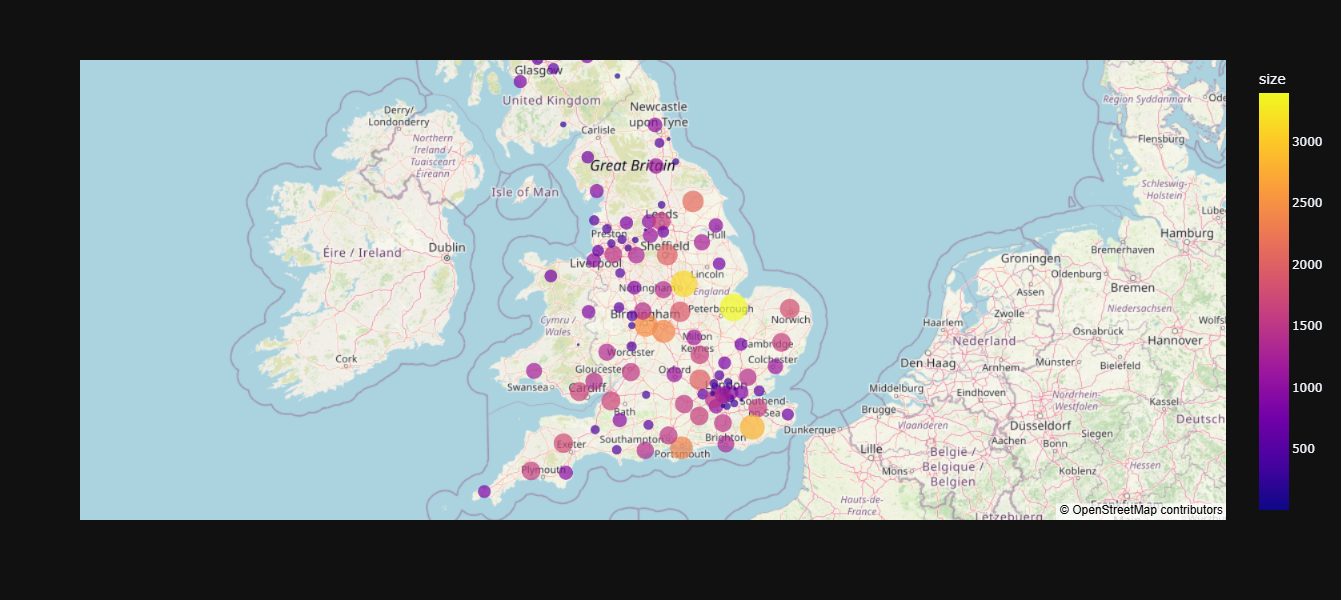

In [90]:
fig = px.scatter_map(
    test_num_by_area_merged,
    lat="latitude",
    lon="longitude",
    size="size",   # whatever metric you have
    color="size",
    hover_data={
        "latitude": False,   # hide lat
        "longitude": False,  # hide lon
        "size": True,
        "districts_num_within_area": True
    },
    hover_name="code_formation",
    map_style='open-street-map',
    zoom=5
)
fig.update_layout(
    
    width=600,
    height=600
    
)
fig.show()

### Number of motorycles which were used first time by decade

In [91]:
#binning first_use_date as decade
decade_bins = pd.cut(first_test['first_use_date'].dt.year, range(1920, 2031, 10), right=False,labels=["1920-1930", "1930-1940","1940-1950","1950-1960","1960-1970","1970-1980","1980-1990","1990-2000", "2000-2010", "2010-2020", "2020-2021"])

In [92]:
decade_bins

19437     2020-2021
125925    1990-2000
95080     1990-2000
34438     2010-2020
64727     2000-2010
            ...    
97982     1990-2000
60461     2020-2021
24894     2010-2020
90860     2010-2020
3018      2000-2010
Name: first_use_date, Length: 109457, dtype: category
Categories (11, object): ['1920-1930' < '1930-1940' < '1940-1950' < '1950-1960' ... '1990-2000' < '2000-2010' < '2010-2020' < '2020-2021']

In [93]:
# number of moto by first use date binned as a decade
moto_num_by_decade = decade_bins.value_counts(
).reset_index(name='moto_num').sort_values(by='first_use_date')
moto_num_by_decade

,first_use_date,moto_num
9,1920-1930,3
10,1930-1940,3
8,1940-1950,8
7,1950-1960,30
6,1960-1970,50
5,1970-1980,192
4,1980-1990,1887
3,1990-2000,11522
1,2000-2010,33294
0,2010-2020,48864


In [94]:
max_value = moto_num_by_decade['moto_num'].max()
buffer = max_value * 0.10  # 10% buffer
x_axis_range = [0, max_value + buffer]

fig = px.bar(moto_num_by_decade, y='first_use_date', x='moto_num',  title="Number of motorycles which were used first time by decade", orientation='h')
fig.update_layout(yaxis=dict(title='', 
                            tickformat=',.0f'),
                  # yaxis_title='',
                  xaxis=dict(
                             title='',
                             showticklabels=False,
                             range=x_axis_range),
                  
                  # autosize=True,
                  bargap=0.1,
                  width=900,
                  height=480,
                  margin=dict(l=10, r=50, t=50, b=0, pad=5))
fig.update_traces(texttemplate='%{x:.0f}', textposition='outside', hoverinfo='skip',  # Disables the hover behavior
    hovertemplate=None)                            
fig.show()

In [95]:
# можно чекнуть, какие результаты теста старых мото, до 1980

### first test fail rate by month

<Axes: xlabel='completed_date'>

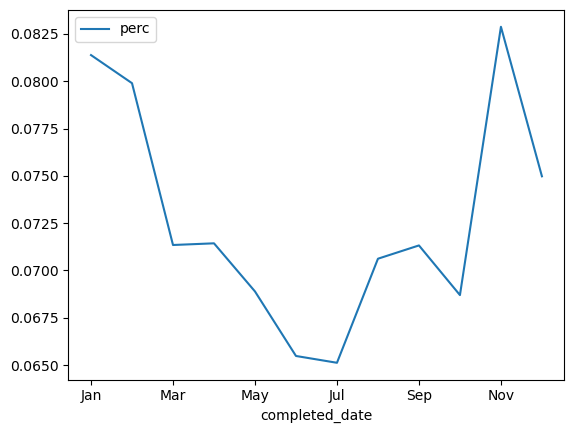

In [96]:
first_test_fail_rate_by_month = first_test.groupby([first_test['completed_date'].dt.month, first_test['completed_date'].dt.strftime('%b'), 'passed']).size().droplevel(level=0).reset_index(name='count')
first_test_fail_rate_by_month['tot_count'] = first_test_fail_rate_by_month.groupby('completed_date')['count'].transform('sum')
first_test_fail_rate_by_month['perc'] = first_test_fail_rate_by_month['count'] / first_test_fail_rate_by_month['tot_count']
first_test_fail_rate_by_month = first_test_fail_rate_by_month.loc[first_test_fail_rate_by_month['passed'] == False]
first_test_fail_rate_by_month.plot(kind='line', x='completed_date', y='perc')
# first_test_fail_rate_by_month.loc[first_test_fail_rate_by_month['passed'] == False].plot(kind='line', x='completed_date', y='rel_count')

In [97]:
first_test_fail_rate_by_month

,completed_date,passed,count,tot_count,perc
0,Jan,False,247,3035,0.081384
2,Feb,False,504,6308,0.079899
4,Mar,False,732,10260,0.071345
6,Apr,False,974,13635,0.071434
8,May,False,1378,20003,0.068890
10,Jun,False,915,13974,0.065479
12,Jul,False,749,11502,0.065119
14,Aug,False,680,9629,0.070620
16,Sep,False,574,8048,0.071322
18,Oct,False,415,6041,0.068697


In [98]:
fig = px.line(first_test_fail_rate_by_month, y='perc', x='completed_date',  title="first test fail rate by month")
fig.update_layout(
            yaxis=dict(title=''),
            xaxis=dict(title=''),     
            # autosize=True,
            bargap=0.1,
            width=900,
            height=480,
            margin=dict(l=10, r=50, t=50, b=0, pad=5))
# fig.update_layout(
#     yaxis=dict(
#         title="",
#         tick0=0,           # start at 0
#         dtick=0.01,        # step = 0.01 = 1%
#         tickformat=".0%"   # show as % (e.g. 0.05 → 5%)
#     ))
                     
fig.show()

In [99]:
from scipy.stats import chi2_contingency
# Створення таблиці спряженості (contingency table)
# Це таблиця, де індексами будуть місяці, а стовпцями - passed/false
contingency_table = first_test_fail_rate_by_month.pivot_table(index='completed_date', columns='passed', values='count', aggfunc='sum')

print("Таблиця частот:")
print(contingency_table)

# Виконання Хі-квадрат тесту
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nРезультати Хі-квадрат тесту:")
print(f"Chi2 Test Statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom (dof): {dof}")

# Інтерпретація результату
alpha = 0.05
print("\nІнтерпретація:")
if p_value < alpha:
    print(f"Оскільки p-value ({p_value:.4f}) < 0.05, ми відхиляємо нульову гіпотезу.")
    print("Різниця в рівні провалених тестів між місяцями є статистично значущою.")
else:
    print(f"Оскільки p-value ({p_value:.4f}) >= 0.05, ми не можемо відхилити нульову гіпотезу.")
    print("Немає достатньо доказів, щоб стверджувати, що різниця є значущою. Вона може бути випадковою.")

Таблиця частот:
passed          False
completed_date       
Apr               974
Aug               680
Dec               237
Feb               504
Jan               247
Jul               749
Jun               915
Mar               732
May              1378
Nov               320
Oct               415
Sep               574

Результати Хі-квадрат тесту:
Chi2 Test Statistic: 0.0
P-value: 1.0
Degrees of Freedom (dof): 0

Інтерпретація:
Оскільки p-value (1.0000) >= 0.05, ми не можемо відхилити нульову гіпотезу.
Немає достатньо доказів, щоб стверджувати, що різниця є значущою. Вона може бути випадковою.


### Percentage of motorcycles failed the first test by its first time use

In [100]:
first_test_fail_rate_by_first_time_used = first_test.copy()
first_test_fail_rate_by_first_time_used['first_time_used'] = pd.to_datetime(first_test_fail_rate_by_first_time_used['first_use_date'], format='%Y').dt.year.astype('Int64')
first_test_fail_rate_by_first_time_used = first_test_fail_rate_by_first_time_used[['first_time_used', 'passed']]
first_test_fail_rate_by_first_time_used = first_test_fail_rate_by_first_time_used.groupby(['first_time_used', 'passed'], as_index=False).size()
first_test_fail_rate_by_first_time_used = first_test_fail_rate_by_first_time_used.pivot_table(
                                                        index='first_time_used',  
                                                        columns='passed',        
                                                        values='size',
                                                        fill_value=0).astype(int)
first_test_fail_rate_by_first_time_used = first_test_fail_rate_by_first_time_used.reset_index().rename(columns={True:'passed', False: 'failed'}).set_index('first_time_used', drop=True)
first_test_fail_rate_by_first_time_used['test_num'] = first_test_fail_rate_by_first_time_used['failed'] + first_test_fail_rate_by_first_time_used['passed']
## remove those years where number of motorcycles were less than 500
first_test_fail_rate_by_first_time_used = first_test_fail_rate_by_first_time_used.loc[first_test_fail_rate_by_first_time_used['test_num'] > 500]
first_test_fail_rate_by_first_time_used['fail_rate'] = (first_test_fail_rate_by_first_time_used['failed'] / (first_test_fail_rate_by_first_time_used['failed'] + first_test_fail_rate_by_first_time_used['passed'])).round(3)

In [101]:
fig = px.line(first_test_fail_rate_by_first_time_used,y='fail_rate', title='Percentage of motorcycles failed the first test by its first time use')
fig.update_layout(yaxis=dict(title='',
                            tickformat=".1%"),
                  # yaxis_title='',
                  xaxis=dict(
                             title=''
                             # showticklabels=False,
                             # range=x_axis_range),
                 ),
                  # autosize=True,
                  bargap=0.1,
                  width=900,
                  height=400,
                  margin=dict(l=10, r=50, t=50, b=0, pad=5))
fig.update_yaxes(rangemode="tozero")
# fig.update_traces(texttemplate='%{x:.0f}', textposition='outside', hoverinfo='skip',  # Disables the hover behavior
#     hovertemplate=None)                            
fig.show()

### Percentage of motorcycles failed first test by brand

In [102]:
## #counting number of successes and failures
brand_fail_rate = first_test.groupby('make', as_index=False)['passed'].value_counts()
#dividing test_result into 2 columns
brand_fail_rate = brand_fail_rate.pivot_table(
                                        index='make', 
                                        columns='passed',    
                                        values='count', 
                                        fill_value=0).astype('int')
brand_fail_rate = brand_fail_rate.reset_index().rename(columns={True:'passed', False: 'failed'}).set_index('make', drop=True)
brand_fail_rate['test_num'] =brand_fail_rate['failed'] + brand_fail_rate['passed']
brand_fail_rate['fail_rate'] = (brand_fail_rate['failed'] / (brand_fail_rate['failed'] + brand_fail_rate['passed'])).round(3)
# dropping make lower than 50
brand_fail_rate = brand_fail_rate.loc[brand_fail_rate['test_num'] > 49]
brand_fail_rate = brand_fail_rate.reset_index(drop=False).sort_values(by='fail_rate', ascending=True)

In [103]:
# makers which motorcycles number having test exceed 1000
pop_brand_fail_rate = brand_fail_rate.loc[brand_fail_rate['test_num'] >= 1000]
# makers which motorcycles number having test is below 1000
nonpop_brand_fail_rate = brand_fail_rate.loc[brand_fail_rate['test_num'] < 1000]

In [104]:
fig = px.bar(pop_brand_fail_rate, y='make', x='fail_rate',  
             
             title="Percentage of motorcycles failed first test by make(exceeding 1000 moto)", orientation='h',
             hover_data=['test_num']
            )
fig.update_layout(yaxis=dict(title=''),
                  # yaxis_title='',
                  xaxis=dict(
                             title='',
                             showticklabels=False,
                             ),
                  
                  # autosize=True,
                  bargap=0.1,
                  width=900,
                  height=480,
                  margin=dict(l=10, r=50, t=50, b=0, pad=5))
fig.update_traces(texttemplate='%{x:.2%}', textposition='inside', 
   hovertemplate=(
       "Number of motorcycles: %{customdata[0]}"
    ))                            
fig.show()

In [105]:
fig = px.bar(nonpop_brand_fail_rate, y='make', x='fail_rate',  
             
             title="Percantage of failed test by makers which total number of motorcycles is below 1000", orientation='h',
             hover_data=['test_num']
            )

fig.update_layout(yaxis=dict(title=''),
                  xaxis=dict(
                             title='',
                             showticklabels=False,
                             ),
                  
                  # autosize=True,
                  bargap=0.1,
                  width=900,
                  height=480,
                  margin=dict(l=10, r=50, t=50, b=0, pad=5))
fig.update_traces(texttemplate='%{x:.2%}', textposition='inside', 
   hovertemplate=(
       "Number of motorcycles: %{customdata[0]}"
    ))                            
fig.show()

### Percantage of failed test by mileage

In [106]:
mileage_bins = pd.cut(first_test['test_mileage'], [0, 1000, 10000, 50000, 100000, np.inf], right=False, labels=["0-1000", "1000-10000", "10000-50000", "50000-100000", "100000+"])
test_result_by_mileage = first_test.groupby(mileage_bins, observed=True, as_index=False)['passed'].value_counts()
test_result_by_mileage = test_result_by_mileage.pivot_table(
                                    index='test_mileage', 
                                    columns='passed',        
                                    values='count', 
                                    observed=True,
                                    fill_value=0).astype('int')
test_result_by_mileage.columns.name = None
test_result_by_mileage = test_result_by_mileage.reset_index().rename(columns={True:'passed', False: 'failed'})
test_result_by_mileage['test_num'] = test_result_by_mileage['failed'] + test_result_by_mileage['passed']
test_result_by_mileage['fail_rate'] = (test_result_by_mileage['failed'] / test_result_by_mileage['test_num'] * 100).round(3)

In [107]:
fig = px.bar(test_result_by_mileage, y='fail_rate', x='test_mileage',
             title="Percantage of failed test by mileage"
            )
fig.update_layout(yaxis=dict(title='',
                            ticksuffix="%"),
                  xaxis=dict(
                             title='',
                             showticklabels=True,
                             ),
                  
                  # autosize=True,
                  bargap=0.1,
                  width=950,
                  height=480,
                  margin=dict(l=10, r=50, t=50, b=0, pad=5))
fig.update_layout(yaxis_tickformat = '.%')
fig.show()

### Fail rate by cylinder capacity

In [108]:
cc_bins = range(0, first_test['cylinder_capacity'].max()+1, 100)
cc_labels = [f'{val}-{val+100}' for val in cc_bins[:-1]]
cc_binned = pd.cut(first_test['cylinder_capacity'], cc_bins, labels=cc_labels, right=False)
fail_rate_by_cc = first_test.groupby(cc_binned, as_index=False, observed=False)['passed'].value_counts()
fail_rate_by_cc = fail_rate_by_cc.pivot_table(
                                            index='cylinder_capacity',  
                                            columns='passed',        
                                            values='count', 
                                            fill_value=0,
                                            observed=False).astype('int')
fail_rate_by_cc.columns.name = None
fail_rate_by_cc = fail_rate_by_cc.reset_index().rename(columns={True:'passed', False: 'failed'})
fail_rate_by_cc['test_num'] = fail_rate_by_cc['failed'] + fail_rate_by_cc['passed']
fail_rate_by_cc['fail_rate'] = (fail_rate_by_cc['failed'] / fail_rate_by_cc['test_num']).round(3) * 100
fail_rate_by_cc.dropna(subset='fail_rate', inplace=True)

In [109]:
fail_rate_by_cc = fail_rate_by_cc.loc[fail_rate_by_cc['test_num'] > 100]

In [110]:
fail_rate_by_cc['fail_rate_str'] = fail_rate_by_cc['fail_rate'].round(2).astype(str)+'%'

fig = px.line(fail_rate_by_cc, 
              y='fail_rate', 
              x='cylinder_capacity',
              title="Fail rate by cylinder capacity",
              hover_data=['test_num', 'fail_rate_str'])

fig.update_layout(
    yaxis=dict(
        title='',
        ticksuffix="%",
        tickformat=".%"
    ),
    xaxis=dict(
        title='',
        showticklabels=True,
        tickfont_size=12,
        tickangle=20
    ),
    bargap=0.1,
    width=1200,
    height=480,
    margin=dict(l=10, r=50, t=50, b=0, pad=5),
)

fig.update_traces(
    hovertemplate=(
        "Number of motorcycles: %{customdata[0]}<br>" + 
        "Fail rate: %{customdata[1]}"
    )
)

fig.show()

In [111]:
fail_rate_by_cc = first_test.groupby('cylinder_capacity', as_index=False, observed=False)['passed'].value_counts()
fail_rate_by_cc = fail_rate_by_cc.pivot_table(
                                            index='cylinder_capacity',  
                                            columns='passed',        
                                            values='count', 
                                            fill_value=0,
                                            observed=False).astype('int')
fail_rate_by_cc.columns.name = None
fail_rate_by_cc = fail_rate_by_cc.reset_index().rename(columns={True:'passed', False: 'failed'})
fail_rate_by_cc['test_num'] = fail_rate_by_cc['failed'] + fail_rate_by_cc['passed']
fail_rate_by_cc['fail_rate'] = (fail_rate_by_cc['failed'] / fail_rate_by_cc['test_num']).round(3) * 100
fail_rate_by_cc.dropna(subset='fail_rate', inplace=True)
fail_rate_by_cc = fail_rate_by_cc.loc[fail_rate_by_cc['test_num'] > 100]

In [112]:
# ДОБАВИТЬ В HOVER CYLINDER_CAPACITY
fail_rate_by_cc['fail_rate_str'] = fail_rate_by_cc['fail_rate'].round(2).astype(str)+'%'

fig = px.scatter(fail_rate_by_cc, 
              y='fail_rate', 
              x='cylinder_capacity',
              trendline="ols",
              title="Fail rate by cylinder capacity",
              hover_data=['test_num', 'fail_rate_str']
                )

fig.update_layout(
    yaxis=dict(
        title='',
        ticksuffix="%",
        tickformat=".%"
    ),
    xaxis=dict(
        title='',
        showticklabels=True,
        tickfont_size=12,
        tickangle=20
    ),
    bargap=0.1,
    width=1200,
    height=480,
    margin=dict(l=10, r=50, t=50, b=0, pad=5),
)

fig.update_traces(
    selector=dict(mode='markers'), # Selects only the scatter points
    hovertemplate=(
        "Number of motorcycles: %{customdata[0]}<br>" +
        "Fail rate: %{customdata[1]}"
    )
)

fig.data[1].hovertemplate = None

fig.update_layout(
    yaxis=dict(
        title='',
        ticksuffix="%",
        tickformat=".%"
    ),
    xaxis=dict(
        title='',
        showticklabels=True,
        tickfont_size=12,
        tickangle=20
    ),
    bargap=0.1,
    width=900,
    height=480,
    margin=dict(l=10, r=50, t=50, b=0, pad=5),
)

fig.show()

## Merging datasets for creating test details

In [113]:
moto_items = ig[['test_item_id', 'test_item_set_section_id', 'item_name']]\
             .merge(
                 ig[['test_item_id', 'item_name']], 
                 how='left',
                 suffixes=('', '_section'),
                 left_on='test_item_set_section_id', 
                 right_on='test_item_id')\
             .drop(['test_item_id_section'], axis=1)\
             .rename(columns={
                      'item_name_section': 'section_name'})
# deleting 'motorcycle' part from section names
moto_items['section_name'] = moto_items['section_name'].str.replace('motorcycle', '', case=False, regex=True).str.strip().str.lower().str.capitalize()
moto_items_itde = itde.merge(moto_items, on=['test_item_id', 'test_item_set_section_id']).rename(columns={'test_item_id': 'item_id', 'test_item_set_section_id': 'section_id'})
moto_items_itde.head()

,rfr_id,item_id,minor_item,rfr_deficiency_category,rfr_desc,section_id,item_name,section_name
0,4,3,True,Pre-EU Directive,an obligatory lamp missing,1,Motorcycle front,Lighting and signalling
1,5,3,True,Pre-EU Directive,so damaged or deteriorated that its function i...,1,Motorcycle front,Lighting and signalling
2,6,3,True,Pre-EU Directive,so damaged or deteriorated that its function i...,1,Motorcycle front,Lighting and signalling
3,7,3,True,Pre-EU Directive,an insecure lamp,1,Motorcycle front,Lighting and signalling
4,8,3,True,Pre-EU Directive,is obscured or does not face the front or rear...,1,Motorcycle front,Lighting and signalling


In [114]:
print(f'Unique motorcycle parts: {(moto_items_itde['section_name'] + '-' + moto_items_itde['item_name']).nunique()}')
print(f'Unique motorcycle sections: {moto_items_itde['section_id'].nunique()}')

Unique motorcycle parts: 198
Unique motorcycle sections: 22


In [115]:
print(f'Unique reasons for rejections: {moto_items_itde['rfr_id'].nunique()}')

Unique reasons for rejections: 1389


In [116]:
moto_items_itde['rfr_deficiency_category'].value_counts()

rfr_deficiency_category
Pre-EU Directive    750
Major               398
Dangerous           179
Minor                62
Name: count, dtype: int64

In [117]:
moto_items_itde.loc[moto_items_itde['rfr_deficiency_category'].isin(['Dangerous', 'Major'])]['minor_item'].value_counts()

minor_item
True     532
False     45
Name: count, dtype: int64

If rfr in `Dangerous` & `Major` categories fails, it will lead to failed test

In [118]:
print('Number of itde by moto section in "Dangerous" & "Major" categories')
moto_items_itde.loc[moto_items_itde['rfr_deficiency_category'].isin(['Dangerous', 'Major'])].groupby('section_name').size().sort_values(ascending=False)

Number of itde by moto section in "Dangerous" & "Major" categories


section_name
Brakes                           169
Suspension                       103
Structure and attachments         96
Lamps and reflectors              76
Steering                          64
Wheels                            30
Tyres                             22
Identification of the vehicle     11
Audible warning (horn)             4
Items not tested                   2
dtype: int64

If rfr in Minor & Major Pre-EU Directive fails, it will not lead to failed test

In [119]:
print('Number of itde by moto section in "Pre-EU Directive" & "Minor" categories')
moto_items_itde.loc[~moto_items_itde['rfr_deficiency_category'].isin(['Dangerous', 'Major'])].groupby('section_name').size().sort_values(ascending=False)

Number of itde by moto section in "Pre-EU Directive" & "Minor" categories


section_name
Lighting and signalling      185
Brakes                       175
Steering and suspension      112
Sidecar                      109
Tyres and wheels              53
Lamps and reflectors          39
Reg plates and vin            37
Non-component advisories      22
Fuel and exhaust              20
Drive system                  19
Body and structure            17
Audible warning (horn)         9
Driving controls               5
Items not tested               3
Suspension                     3
Structure and attachments      2
Performance                    1
Steering                       1
dtype: int64

# 4. Detailed analysis

In [120]:
test_details = ti.merge(moto_items_itde, on='rfr_id', how='left')
test_details.head()

,test_id,rfr_id,rfr_type_code,mot_test_rfr_location_type_id,completed_date,item_id,minor_item,rfr_deficiency_category,rfr_desc,section_id,item_name,section_name
0,939637859,40098,A,9,2024-01-02 10:03:29,25016.0,True,Dangerous,Brake lining or pad worn below 1.0mm,25003.0,Brake pads,Brakes
1,589679699,40573,A,1,2024-01-03 09:32:07,25116.0,True,Major,"A transmission belt, chain, sprocket or pulley...",25105.0,Drive chain,Structure and attachments
2,589679699,40184,A,7,2024-01-03 09:32:07,25006.0,True,Major,"Brake control so positioned, bent or shortened...",25003.0,Handlebar lever,Brakes
3,589679699,40286,F,1,2024-01-03 09:32:07,25066.0,True,Major,The aim of a headlamp is not within limits lai...,25061.0,Headlamp aim,Lamps and reflectors
4,589679699,40098,F,7,2024-01-03 09:32:07,25016.0,True,Dangerous,Brake lining or pad worn below 1.0mm,25003.0,Brake pads,Brakes


In [121]:
first_test_details = first_test.merge(test_details, on=['test_id', 'completed_date'], how='inner').drop(['test_id', 'test_type'], axis=1)
first_test_details.head()

,vehicle_id,test_result,test_mileage,postcode_area,make,model,cylinder_capacity,first_use_date,completed_date,passed,rfr_id,rfr_type_code,mot_test_rfr_location_type_id,item_id,minor_item,rfr_deficiency_category,rfr_desc,section_id,item_name,section_name
0,13284,PRS,33733,LE,YAMAHA,FZS600,599,1999-11-24,2024-07-15 12:02:36,True,40669,PRS,1,25072.0,False,Dangerous,A stop lamp(s) does not illuminate by the oper...,25061.0,Stop lamp,Lamps and reflectors
1,34017,P,9897,YO,KAWASAKI,ZX 636 GKFA,636,2019-07-21,2024-04-06 12:20:20,True,40428,A,7,25104.0,True,Dangerous,Tyre tread depth not in accordance with the re...,25102.0,Condition,Tyres
2,136891,P,8217,MK,TRIUMPH,BONNEVILLE,865,2016-05-28,2024-10-25 10:03:07,True,40428,A,7,25104.0,True,Dangerous,Tyre tread depth not in accordance with the re...,25102.0,Condition,Tyres
3,167432,PRS,8634,PL,TRIUMPH,BONNEVILLE,850,1987-08-18,2024-05-15 08:45:00,True,40100,PRS,9,25016.0,True,Major,"A brake lining or pad contaminated with oil, g...",25003.0,Brake pads,Brakes
4,167867,P,2807,LA,KTM,790 DUKE 20,799,2020-07-18,2024-10-14 16:43:57,True,40428,A,9,25104.0,True,Dangerous,Tyre tread depth not in accordance with the re...,25102.0,Condition,Tyres


In [122]:
# cтатистика, сколько мото прошло тест без дефектов, с минимальными дефектами и тд

In [123]:
first_test_num = first_test['vehicle_id'].nunique()
trv = first_test['test_result'].value_counts()
motos_passed_flawlessly = first_test_num-first_test_details["vehicle_id"].nunique()

motos_passed_flawlessly = first_test_num-first_test_details["vehicle_id"].nunique()
motos_passed_minor_defects = trv["P"] - motos_passed_flawlessly
motos_passed_prs = trv["PRS"]
motos_failed = trv["F"]
motos_aborted = trv["ABR"]
motos_abandoned = trv["ABA"]

data = {
    "moto_num": [
        motos_passed_flawlessly,
        motos_passed_minor_defects,
        motos_passed_prs,
        motos_failed,
        motos_aborted,
        motos_abandoned
    ]
}

index = [
    "motos passed test flawlessly",
    "motos passed test with minor defects",
    "motos passed test after PRS",
    "motos failed test",
    "motos aborted test",
    "motos abandoned test"
]

first_test_stats = pd.DataFrame(data, index=index)
# first_test_stats.loc["total"] = first_test_stats["moto_num"].sum()


first_test_stats["percentage(%)"] = (first_test_stats["moto_num"] / first_test_stats['moto_num'].sum() * 100).round(3)
first_test_stats

,moto_num,percentage(%)
motos passed test flawlessly,82274,75.166
motos passed test with minor defects,14302,13.066
motos passed test after PRS,5156,4.711
motos failed test,7444,6.801
motos aborted test,262,0.239
motos abandoned test,19,0.017


In [124]:

# упомянуть, что мы не считаем мото, которые прошли тест без дефектов
first_test_res_pivot = first_test_details.pivot_table(index=['rfr_deficiency_category', 'rfr_type_code'], columns='passed', values='vehicle_id', aggfunc='size',
    fill_value=0)
first_test_res_pivot['failed_pct'] =  (first_test_res_pivot[False] / first_test_res_pivot[False].sum()).round(2)
first_test_res_pivot['passed_pct'] =  (first_test_res_pivot[True] / first_test_res_pivot[True].sum()).round(2)
first_test_res_pivot['passed_moto_mean'] = (first_test_res_pivot[True] / first_test_details.loc[first_test_details['passed']==True, 'vehicle_id'].nunique()).round(2)
first_test_res_pivot['failed_moto_mean'] = (first_test_res_pivot[False] / first_test_details.loc[first_test_details['passed']==False, 'vehicle_id'].nunique()).round(2)
grand = first_test_res_pivot.sum(axis=0).to_frame().T
grand.index = pd.MultiIndex.from_tuples([('All', 'All')])   # matches the row MultiIndex
first_test_res_pivot = pd.concat([first_test_res_pivot, grand]).rename(columns={True: 'passed', False: 'failed'})
first_test_res_pivot = first_test_res_pivot[['passed', 'passed_moto_mean', 'passed_pct', 'failed', 'failed_moto_mean',  'failed_pct']]
first_test_res_pivot.columns.name = None
first_test_res_pivot

passed  passed_moto_mean  passed_pct   failed  \
Dangerous        A     9066.0              0.42        0.26   1619.0   
                 F        0.0              0.00        0.00   2624.0   
                 PRS    644.0              0.03        0.02     14.0   
Major            A    19305.0              0.90        0.56   3726.0   
                 F        0.0              0.00        0.00   8686.0   
                 PRS   4086.0              0.19        0.12    126.0   
Minor            A        8.0              0.00        0.00      5.0   
                 M     1033.0              0.05        0.03    415.0   
Pre-EU Directive A      310.0              0.01        0.01     92.0   
All              All  34452.0              1.60        1.00  17307.0   

                      failed_moto_mean  failed_pct  
Dangerous        A                0.28        0.09  
                 F                0.46        0.15  
                 PRS              0.00        0.00  
Major            A                0.65        0.22  
                 F                1.51        0.50  
                 PRS              0.02        0.01  
Minor            A                0.00        0.00  
                 M                0.07        0.02  
Pre-EU Directive A                0.02        0.01  
All              All              3.01        1.00

In [125]:
first_test_advisory_flaws = first_test_details.loc[first_test_details['rfr_type_code'].isin(['A', 'M'])].groupby(['rfr_deficiency_category','section_name', 'item_name', 'rfr_desc'], as_index=False).size().sort_values(by='size',ascending=False)
first_test_advisory_flaws['flaw'] = 'Minor'
first_test_advisory_flaws

,rfr_deficiency_category,section_name,item_name,rfr_desc,size,flaw
76,Major,Structure and attachments,Exhaust system,Exhaust noise levels in excess of those permitted,5965,Minor
7,Dangerous,Tyres,Condition,Tyre tread depth not in accordance with the re...,5961,Minor
3,Dangerous,Brakes,Brake pads,Brake lining or pad worn below 1.0mm,3163,Minor
41,Major,Brakes,Roller brake test,Excessive fluctuation in brake effort through ...,2639,Minor
74,Major,Structure and attachments,Drive chain,"A transmission belt, chain, sprocket or pulley...",2632,Minor
...,...,...,...,...,...,...
85,Major,Structure and attachments,Pipe,"Fuel tank, pipe or hose insecure",1,Minor
4,Dangerous,Steering,Handlebars,"Handlebar fractured, deformed or corroded to t...",1,Minor
86,Major,Structure and attachments,Sidecar structure,A main load-bearing structural member modified...,1,Minor
91,Major,Suspension,Attachment/mounting,A suspension component with an unsafe modifica...,1,Minor


In [126]:
first_test_fixeble_flaws = first_test_details.loc[first_test_details['rfr_type_code'].isin(['PRS'])].groupby(['rfr_deficiency_category', 'section_name', 'item_name', 'rfr_desc'], as_index=False).size().sort_values(by='size',ascending=False)
first_test_fixeble_flaws['flaw'] = 'Fixeble'
first_test_fixeble_flaws

,rfr_deficiency_category,section_name,item_name,rfr_desc,size,flaw
92,Major,Lamps and reflectors,Headlamp aim,The aim of a headlamp is not within limits lai...,883,Fixeble
104,Major,Lamps and reflectors,Rear reflectors,Reflector missing or reflecting white to the rear,874,Fixeble
77,Major,Identification of the vehicle,Registration plate,Number plate does not conform to the specified...,289,Fixeble
113,Major,Lamps and reflectors,Stop lamp,"Stop lamp missing, inoperative or in the case ...",273,Fixeble
40,Major,Audible warning (horn),Motorcycle audible warning (Horn),Audible warning not working,198,Fixeble
...,...,...,...,...,...,...
39,Dangerous,Wheels,Condition,"A wheel corroded, damaged or distorted to the ...",1,Fixeble
1,Dangerous,Brakes,Brake cylinders,Brake calliper or cylinder leaking and braking...,1,Fixeble
29,Dangerous,Suspension,Pins/bushes/ball joints,"A suspension pin, bush or joint likely to beco...",1,Fixeble
130,Major,Structure and attachments,Belt guard,A drive chain or belt guard insecure,1,Fixeble


In [127]:
first_test_failed = first_test_details.loc[lambda x: ~x['test_result'].isin(['PRS', 'P', 'ABR'])]
first_test_failed_key_reasons = first_test_failed.loc[first_test_failed['rfr_type_code']=='F'] 

In [128]:
first_test_severe_flaws = first_test_failed_key_reasons.groupby(['rfr_deficiency_category','section_name', 'item_name', 'rfr_desc'], as_index=False).size().sort_values(by='size',ascending=False).reset_index(drop=True)
first_test_severe_flaws['flaw'] = 'Severe'
first_test_severe_flaws

,rfr_deficiency_category,section_name,item_name,rfr_desc,size,flaw
0,Major,Suspension,Shock absorbers,A shock absorber not functioning or leaking se...,828,Severe
1,Dangerous,Tyres,Condition,Tyre tread depth not in accordance with the re...,786,Severe
2,Dangerous,Brakes,Brake pads,Brake lining or pad worn below 1.0mm,518,Severe
3,Major,Lamps and reflectors,Rear reflectors,Reflector missing or reflecting white to the rear,408,Severe
4,Major,Identification of the vehicle,Registration plate,Number plate does not conform to the specified...,402,Severe
...,...,...,...,...,...,...
235,Major,Structure and attachments,Motorcycle structure,A main load-bearing structural member fracture...,1,Severe
236,Major,Structure and attachments,Motorcycle structure,A main load-bearing structural member modified...,1,Severe
237,Major,Steering,Handlebars,Handlebar grip missing,1,Severe
238,Major,Brakes,Clevis joint,"Cable, rod or joint insecure",1,Severe


In [129]:
all_flaws = pd.concat([first_test_advisory_flaws, first_test_fixeble_flaws, first_test_severe_flaws])

In [130]:
# переименовать график

In [131]:
fig = px.treemap(
    all_flaws,
    path=["flaw", "section_name", "item_name", "rfr_desc"],  # hierarchy
    values='size'
)
fig.update_layout(width=1100, height=700, title='Top 50 reasons for rejection by deficiency category, item name & section')

In [132]:
ftf_reasons = first_test_failed.loc[first_test_failed['rfr_deficiency_category'].isin(['Major', 'Dangerous'])]

In [133]:
# # проверяю, нужна ли эта секцтя
# ftf_reasons.groupby(['rfr_deficiency_category', 'rfr_type_code']).size()

In [134]:
# number of motos with certain number of defected parts in 'Major', 'Dangerous' categories
rfr_per_moto = ftf_reasons.groupby('vehicle_id')['rfr_id'].agg(rfr_num='count')
rfr_per_moto['rfr_num'].value_counts().sort_index()

rfr_num
1     1524
2     1478
3     1062
4      708
5      397
6      246
7      161
8       77
9       36
10      21
11      13
12      10
13       4
14       6
15       3
16       1
18       1
20       3
21       1
Name: count, dtype: int64

In [135]:
# пересчитать еще раз
for rfr_num in range(1,17):
    moto_ids = rfr_per_moto[rfr_per_moto['rfr_num'] == rfr_num].index
    moto = tr.loc[tr['vehicle_id'].isin(moto_ids)]\
                  .sort_values(by=['vehicle_id', 'completed_date'])\
                  .groupby('vehicle_id', as_index=False).last()

    # print(moto['passed'].value_counts(normalize=True)*100) 
    print(f'% of moto eventually passed the test with {rfr_num} defects: {(moto['passed'].value_counts(normalize=True)[True]*100).round(2)}%')

% of moto eventually passed the test with 1 defects: 89.3%
% of moto eventually passed the test with 2 defects: 88.23%
% of moto eventually passed the test with 3 defects: 84.56%
% of moto eventually passed the test with 4 defects: 81.36%
% of moto eventually passed the test with 5 defects: 78.09%
% of moto eventually passed the test with 6 defects: 75.61%
% of moto eventually passed the test with 7 defects: 72.05%
% of moto eventually passed the test with 8 defects: 70.13%
% of moto eventually passed the test with 9 defects: 72.22%
% of moto eventually passed the test with 10 defects: 33.33%
% of moto eventually passed the test with 11 defects: 53.85%
% of moto eventually passed the test with 12 defects: 40.0%
% of moto eventually passed the test with 13 defects: 25.0%
% of moto eventually passed the test with 14 defects: 66.67%
% of moto eventually passed the test with 15 defects: 33.33%
% of moto eventually passed the test with 16 defects: 100.0%


In [136]:
first_test_failed

,vehicle_id,test_result,test_mileage,postcode_area,make,model,cylinder_capacity,first_use_date,completed_date,passed,rfr_id,rfr_type_code,mot_test_rfr_location_type_id,item_id,minor_item,rfr_deficiency_category,rfr_desc,section_id,item_name,section_name
7,315891,F,18382,CH,HONDA,GLR,125,2019-07-19,2024-07-11 14:46:50,False,40289,F,7,25066.0,True,Major,The aim of a headlamp is not within limits lai...,25061.0,Headlamp aim,Lamps and reflectors
8,315891,F,18382,CH,HONDA,GLR,125,2019-07-19,2024-07-11 14:46:50,False,40254,F,3,25054.0,True,Dangerous,Handlebar grip insecure to handlebar,25046.0,Handlebars,Steering
9,315891,F,18382,CH,HONDA,GLR,125,2019-07-19,2024-07-11 14:46:50,False,40645,F,7,25057.0,False,Major,"Steering head bearings excessively stiff, notc...",25046.0,Headbearings,Steering
10,315891,F,18382,CH,HONDA,GLR,125,2019-07-19,2024-07-11 14:46:50,False,40428,F,27,25104.0,True,Dangerous,Tyre tread depth not in accordance with the re...,25102.0,Condition,Tyres
11,315891,F,18382,CH,HONDA,GLR,125,2019-07-19,2024-07-11 14:46:50,False,40428,A,239,25104.0,True,Dangerous,Tyre tread depth not in accordance with the re...,25102.0,Condition,Tyres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51764,1499407108,F,17210,GL,KAWASAKI,W650,676,2001-01-04,2024-04-20 09:06:22,False,40304,F,7,25069.0,True,Major,A lamp missing or inoperative,25061.0,Position lamp,Lamps and reflectors
51769,1499965007,F,7743,BS,KAWASAKI,EX250,249,2014-03-01,2024-03-15 14:47:15,False,40206,F,7,25035.0,True,Major,Significant brake effort recorded with no brak...,25003.0,Roller brake test,Brakes
51770,1499965007,F,7743,BS,KAWASAKI,EX250,249,2014-03-01,2024-03-15 14:47:15,False,40206,F,9,25035.0,True,Major,Significant brake effort recorded with no brak...,25003.0,Roller brake test,Brakes
51771,1499965007,F,7743,BS,KAWASAKI,EX250,249,2014-03-01,2024-03-15 14:47:15,False,40683,F,9,25085.0,False,Major,A shock absorber not functioning or leaking se...,25081.0,Shock absorbers,Suspension


In [137]:
rfr_num_by_section = first_test_failed.loc[first_test_failed['rfr_type_code']=='F']['section_name'].value_counts().reset_index()
rfr_num_by_section['pct'] = (rfr_num_by_section['count'] / rfr_num_by_section['count'].sum())
rfr_num_by_section['cumsum_pct'] = rfr_num_by_section['pct'].cumsum()
# rfr_num_by_section.head()

In [138]:
import plotly.express as px
import plotly.graph_objects as go

# Use one consistent dataframe
df = rfr_num_by_section.head(10).copy()

# bar chart
fig = px.bar(
    df, 
    x="section_name", 
    y="count",
    title="Number of failed items by motorcycle detail section",
    hover_data=["count"]
)

# cumulative line
fig.add_trace(
    go.Scatter(
        x=df["section_name"], 
        y=df["cumsum_pct"],
        mode="lines+markers",
        name="Cumulative sum",
        yaxis="y2",
        hovertemplate="Category: %{x}<br>Cumulative sum: %{y:.2%}<extra></extra>"
    )
)

# layout
fig.update_layout(
    yaxis=dict(title=""),
    yaxis2=dict(
        title="",
        overlaying="y",
        side="right",
        range=[0, 1],
        tickformat=".0%"
    ),
    xaxis=dict(title="", showticklabels=True),
    bargap=0.1,
    width=900,
    height=480,
    margin=dict(l=10, r=50, t=50, b=0, pad=5),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1.05,
        xanchor="center",
        x=0.5
    ),
)

fig.show()


In [139]:
# мое исследование

ЕСЛИ "rfr_deficiency_category" МОТОЦИКЛА = ['Dangerous', 'Major'], А "rfr_type_code" = ['A', 'P', 'M'] , то в любом случае, есть деталь, "rfr_type_code" которой будет 'F' 

In [140]:
vehicle_id_apm = first_test_failed.loc[(first_test_failed['rfr_deficiency_category'].isin(['Dangerous', 'Major'])) & (first_test_failed["rfr_type_code"]).isin(['A', 'P', 'M']), 'vehicle_id'].values
vehicles_apm = first_test_failed.loc[first_test_failed['vehicle_id'].isin(vehicle_id_apm)]
print(vehicles_apm['vehicle_id'].nunique())
f_rfr = vehicles_apm.loc[vehicles_apm['rfr_type_code']=='F']
print(f_rfr['vehicle_id'].nunique())

2896
2896


In [141]:
# # ТО ЖЕ САМОЕ ЧТО И ВВЕРХУ, ТОЛЬКО С rfr_deficiency_category
# top_50_reasons = first_test_failed_key_reasons.groupby(['rfr_deficiency_category', 'section_name', 'item_name', 'rfr_desc'], 
#                           as_index=False)\
#                          .size()\
#                          .sort_values(by=['size'], ascending=[False])\
#                          .reset_index(drop=True)\
#                          .head(50)
# top_50_reasons

In [142]:
# fig = px.treemap(
#     top_50_reasons,
#     path=["rfr_deficiency_category", "section_name", "item_name", "rfr_desc"],  # hierarchy
#     values='size'
# )
# fig.update_layout(width=1100, height=700, title='Top 50 reasons for rejection by deficiency category, item name & section')

In [143]:
# first_test_failed_dang_reasons = first_test_failed_key_reasons.loc[first_test_failed_key_reasons['rfr_deficiency_category']=='Dangerous']

In [144]:
# dang_20_reasons = first_test_failed_dang_reasons.groupby(['section_name', 'item_name', 'rfr_desc'], 
#                           as_index=False)\
#                          .size()\
#                          .sort_values(by=['size'], ascending=[False])\
#                          .reset_index(drop=True)\
#                          .head(20)
# dang_20_reasons

In [145]:
# fig = px.treemap(
#     dang_20_reasons,
#     path=["section_name", "item_name", "rfr_desc"],  # hierarchy
#     values="size"
# )
# fig.update_layout(width=1100, height=700, title='Top 20 reasons for rejection in category "Dangerous" by item name & section')

In [146]:
# first_test_failed_maj_reasons = first_test_failed_key_reasons.loc[first_test_failed_key_reasons['rfr_deficiency_category']=='Major']

In [147]:
# maj_20_reasons = first_test_failed_maj_reasons.groupby(['section_name', 'item_name', 'rfr_desc'], 
#                           as_index=False)\
#                          .size()\
#                          .sort_values(by=['size'], ascending=[False])\
#                          .reset_index(drop=True)\
#                          .head(20)

In [148]:
top_5_makers = first_test_failed['make'].value_counts().head(5).index
top_5_makers

Index(['HONDA', 'YAMAHA', 'SUZUKI', 'KAWASAKI', 'TRIUMPH'], dtype='object', name='make')

In [149]:
top10_rfr_per_make = (
    first_test_failed_key_reasons.loc[first_test_failed_key_reasons['make'].isin(top_5_makers)]
    .groupby(['make', 'rfr_desc'], as_index=False)
    .size()
    .sort_values(by=['make', 'size'], ascending=[True, False])
    .groupby('make')               # group again by make
    .head(10)                       # take top 5 per make
    .reset_index(drop=True)
)
# top10_rfr_per_make
rfr_matrix = top10_rfr_per_make.pivot_table(index='rfr_desc', columns='make',
                              aggfunc=len, fill_value=0).astype(bool)
rfr_matrix['make_num'] = rfr_matrix.sum(axis=1)
rfr_matrix.sort_values('make_num', ascending=False)

size                  \
make                                                HONDA KAWASAKI SUZUKI   
rfr_desc                                                                    
A shock absorber not functioning or leaking sev...   True     True   True   
Brake lining or pad worn below 1.0mm                 True     True   True   
Significant brake effort recorded with no brake...   True     True   True   
Tyre tread depth not in accordance with the req...   True     True   True   
A direction indicator lamp missing, inoperative...   True     True   True   
Stop lamp missing, inoperative or in the case o...   True     True   True   
The aim of a headlamp is not within limits laid...   True     True  False   
A headlamp missing, inoperative or more than ½ ...   True    False   True   
A rear registration plate lamp or light source ...  False     True   True   
Number plate does not conform to the specified ...  False    False   True   
Audible warning not working                         False     True  False   
Excessive fluctuation in brake effort through e...   True    False  False   
Reflector missing or reflecting white to the rear   False     True  False   
A lamp missing or inoperative                       False    False   True   
A transmission belt, chain, sprocket or pulley ...   True    False  False   
Projected beam image is obviously incorrect         False    False  False   

                                                                  make_num  
make                                               TRIUMPH YAMAHA           
rfr_desc                                                                    
A shock absorber not functioning or leaking sev...    True   True        5  
Brake lining or pad worn below 1.0mm                  True   True        5  
Significant brake effort recorded with no brake...    True   True        5  
Tyre tread depth not in accordance with the req...    True   True        5  
A direction indicator lamp missing, inoperative...   False   True        4  
Stop lamp missing, inoperative or in the case o...   False   True        4  
The aim of a headlamp is not within limits laid...    True   True        4  
A headlamp missing, inoperative or more than ½ ...    True  False        3  
A rear registration plate lamp or light source ...   False   True        3  
Number plate does not conform to the specified ...    True   True        3  
Audible warning not working                           True  False        2  
Excessive fluctuation in brake effort through e...    True  False        2  
Reflector missing or reflecting white to the rear    False   True        2  
A lamp missing or inoperative                        False  False        1  
A transmission belt, chain, sprocket or pulley ...   False  False        1  
Projected beam image is obviously incorrect           True  False        1

In [150]:
# статистика по мотоциклам, которые провалили первый тест и не участвовали во втором
moto_failed_first_test_vals = first_test.loc[first_test['passed']==False, 'vehicle_id'].values
second_test_moto_vals = tr.sort_values(by=['vehicle_id', 'completed_date']).groupby('vehicle_id').nth(1)['vehicle_id'].values
moto_abandonded_second_test = tr.loc[(tr['vehicle_id'].isin(moto_failed_first_test_vals)) & (~tr['vehicle_id'].isin(second_test_moto_vals))]
moto_abandonded_second_test_details = moto_abandonded_second_test.merge(test_details, on=['test_id', 'completed_date'], how='left')\
                                                                 .drop(['test_id', 'test_type'], axis=1)\
                                                                 .loc[lambda x: x['rfr_type_code']=='F']
moto_abandonded_second_test_reasons = moto_abandonded_second_test_details.groupby(['rfr_deficiency_category', 'section_name', 'item_name', 'rfr_desc'], as_index=False).size().sort_values(by=['size'], ascending=[False])\
                         .reset_index(drop=True)
moto_abandonded_second_test_reasons

,rfr_deficiency_category,section_name,item_name,rfr_desc,size
0,Major,Suspension,Shock absorbers,A shock absorber not functioning or leaking se...,259
1,Dangerous,Tyres,Condition,Tyre tread depth not in accordance with the re...,116
2,Major,Brakes,Roller brake test,Excessive fluctuation in brake effort through ...,82
3,Major,Lamps and reflectors,Rear reflectors,Reflector missing or reflecting white to the rear,75
4,Major,Lamps and reflectors,Headlamp aim,The aim of a headlamp is not within limits lai...,69
...,...,...,...,...,...
170,Dangerous,Brakes,Rigid brake pipes,Leaking brake pipe or connection,1
171,Dangerous,Suspension,Condition,A suspension component modified so that the su...,1
172,Major,Brakes,Plate brake test,Excessive fluctuation in brake effort through ...,1
173,Dangerous,Steering,Handlebars,"Handlebar fractured, deformed or corroded to t...",1


In [151]:
# главные причины провала первого теста мотоциклами, но участвовала во втором
moto_having_second_test_first_test_res = tr.loc[tr['vehicle_id'].isin(second_test_moto_vals)].sort_values(by=['vehicle_id', 'completed_date']).groupby('vehicle_id').nth(0)
moto_having_second_test_first_test_details = moto_having_second_test_first_test_res.merge(test_details, on=['test_id', 'completed_date'], how='left')\
                                                                 .drop(['test_id', 'test_type'], axis=1)\
                                                                 .loc[lambda x: x['rfr_type_code']=='F']
moto_having_second_test_first_test_reasons = moto_having_second_test_first_test_details.groupby(['rfr_deficiency_category', 'section_name', 'item_name', 'rfr_desc'], as_index=False)\
                                          .size()\
                                          .sort_values(by=['size'], ascending=[False])\
                                          .reset_index(drop=True)
moto_having_second_test_first_test_reasons

,rfr_deficiency_category,section_name,item_name,rfr_desc,size
0,Dangerous,Tyres,Condition,Tyre tread depth not in accordance with the re...,670
1,Major,Suspension,Shock absorbers,A shock absorber not functioning or leaking se...,569
2,Dangerous,Brakes,Brake pads,Brake lining or pad worn below 1.0mm,450
3,Major,Identification of the vehicle,Registration plate,Number plate does not conform to the specified...,343
4,Major,Lamps and reflectors,Rear reflectors,Reflector missing or reflecting white to the rear,333
...,...,...,...,...,...
220,Major,Brakes,Plate brake test,Brake efficiency below minimum requirement,1
221,Dangerous,Steering,Fork yoke,Forks or fork yoke in such a condition that st...,1
222,Dangerous,Brakes,Rigid brake pipes,Leaking brake pipe or connection,1
223,Major,Structure and attachments,Motorcycle engine mountings,An engine mounting or bracket severely damaged...,1


In [152]:
continue_vs_abandoned = moto_abandonded_second_test_reasons.merge(moto_having_second_test_first_test_reasons, how='left', on=['rfr_deficiency_category', 'section_name', 'item_name', 'rfr_desc'], suffixes=('_abandoned', '_continue')).head(50)
continue_vs_abandoned["rank_abandoned"] = continue_vs_abandoned["size_abandoned"].rank(method="min", ascending=False)
continue_vs_abandoned["rank_continue"] = continue_vs_abandoned["size_continue"].rank(method="min", ascending=False)
continue_vs_abandoned["rank_diff"] = continue_vs_abandoned["rank_continue"] - continue_vs_abandoned["rank_abandoned"]
continue_vs_abandoned.sort_values(by='rank_diff', ascending=False).reset_index(drop=True).head(15)

,rfr_deficiency_category,section_name,item_name,rfr_desc,size_abandoned,size_continue,rank_abandoned,rank_continue,rank_diff
0,Major,Structure and attachments,Exhaust system,Exhaust system leaking or insecure,36,46.0,23.0,40.0,17.0
1,Major,Brakes,Brake discs,Brake disc or drum significantly and obviously...,22,41.0,30.0,43.0,13.0
2,Dangerous,Structure and attachments,Riders seat,A rider’s seat missing or insecure,17,26.0,34.0,47.0,13.0
3,Major,Brakes,Roller brake test,Excessive fluctuation in brake effort through ...,82,218.0,3.0,14.0,11.0
4,Major,Brakes,Handlebar lever,Brake control has insufficient reserve travel,25,51.0,28.0,38.0,10.0
5,Major,Structure and attachments,Exhaust system,Exhaust noise levels in excess of those permitted,39,87.0,19.0,28.0,9.0
6,Major,Steering,Headbearings,"Steering head bearings excessively stiff, notc...",44,122.0,14.0,22.0,8.0
7,Dangerous,Structure and attachments,Drive chain,"A transmission belt, chain, sprocket or pulley...",15,37.0,37.0,44.0,7.0
8,Dangerous,Structure and attachments,Throttle,A throttle control functioning such that safe ...,14,36.0,39.0,45.0,6.0
9,Major,Brakes,Brake discs,"Contaminated with oil, grease etc",28,69.0,26.0,32.0,6.0


In [153]:
# проверить может ли одна и та же деталь принадлежать к разным группах('rfr_type_code')
first_test_details.groupby(['item_name', 'rfr_type_code'], as_index=False).size()

,item_name,rfr_type_code,size
0,All direction indicators,A,30
1,All direction indicators,F,125
2,All direction indicators,M,254
3,All direction indicators,PRS,26
4,All position lamps,F,20
...,...,...,...
217,Wheel alignment,F,38
218,Wheel alignment,PRS,13
219,Wheel bearings,A,756
220,Wheel bearings,F,386


In [154]:
# те детали, которые фиксятся сложнее всего

In [155]:
first_test_details

,vehicle_id,test_result,test_mileage,postcode_area,make,model,cylinder_capacity,first_use_date,completed_date,passed,rfr_id,rfr_type_code,mot_test_rfr_location_type_id,item_id,minor_item,rfr_deficiency_category,rfr_desc,section_id,item_name,section_name
0,13284,PRS,33733,LE,YAMAHA,FZS600,599,1999-11-24,2024-07-15 12:02:36,True,40669,PRS,1,25072.0,False,Dangerous,A stop lamp(s) does not illuminate by the oper...,25061.0,Stop lamp,Lamps and reflectors
1,34017,P,9897,YO,KAWASAKI,ZX 636 GKFA,636,2019-07-21,2024-04-06 12:20:20,True,40428,A,7,25104.0,True,Dangerous,Tyre tread depth not in accordance with the re...,25102.0,Condition,Tyres
2,136891,P,8217,MK,TRIUMPH,BONNEVILLE,865,2016-05-28,2024-10-25 10:03:07,True,40428,A,7,25104.0,True,Dangerous,Tyre tread depth not in accordance with the re...,25102.0,Condition,Tyres
3,167432,PRS,8634,PL,TRIUMPH,BONNEVILLE,850,1987-08-18,2024-05-15 08:45:00,True,40100,PRS,9,25016.0,True,Major,"A brake lining or pad contaminated with oil, g...",25003.0,Brake pads,Brakes
4,167867,P,2807,LA,KTM,790 DUKE 20,799,2020-07-18,2024-10-14 16:43:57,True,40428,A,9,25104.0,True,Dangerous,Tyre tread depth not in accordance with the re...,25102.0,Condition,Tyres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51768,1499757188,P,13451,SO,TRIUMPH,SPEED TRIPLE 955I,955,2003-06-11,2024-08-15 10:41:53,True,40450,A,25,25085.0,True,Major,A shock absorber not functioning or leaking se...,25081.0,Shock absorbers,Suspension
51769,1499965007,F,7743,BS,KAWASAKI,EX250,249,2014-03-01,2024-03-15 14:47:15,False,40206,F,7,25035.0,True,Major,Significant brake effort recorded with no brak...,25003.0,Roller brake test,Brakes
51770,1499965007,F,7743,BS,KAWASAKI,EX250,249,2014-03-01,2024-03-15 14:47:15,False,40206,F,9,25035.0,True,Major,Significant brake effort recorded with no brak...,25003.0,Roller brake test,Brakes
51771,1499965007,F,7743,BS,KAWASAKI,EX250,249,2014-03-01,2024-03-15 14:47:15,False,40683,F,9,25085.0,False,Major,A shock absorber not functioning or leaking se...,25081.0,Shock absorbers,Suspension


In [156]:
# сколько машин после провала прошли тест бесплатно, а сколько - нет

In [169]:
prs_vals = test_result_original.sort_values(by=['vehicle_id', 'completed_date']).groupby('vehicle_id').nth(0).loc[lambda x:x['test_result']=='PRS', 'vehicle_id'].values

In [170]:
test_result_original.sort_values(by=['vehicle_id', 'completed_date']).groupby('vehicle_id').nth(1).loc[lambda x: x['vehicle_id'].isin(prs_vals)]

,Unnamed: 0,test_id,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,completed_date
75106,75106,657966411,167432,2024-05-15,2,NT,PRS,8634.0,PL,TRIUMPH,BONNEVILLE,GREEN,PE,850.0,1987-08-18,2024-05-15T08:45:00.000Z
51717,51717,1753882399,2420086,2024-04-15,2,NT,PRS,22749.0,CV,SUZUKI,VL 800 K4,BLACK,PE,805.0,2007-03-01,2024-04-15T12:56:57.000Z
29711,29711,813785303,4091959,2024-03-26,2,NT,PRS,10336.0,TA,HONDA,CRF,BLACK,PE,998.0,2017-03-30,2024-03-26T13:20:27.000Z
37785,37785,1628164195,5579098,2024-04-11,2,NT,PRS,25147.0,BS,HARLEY-DAVIDSON,FXDWGI,MULTI-COLOUR,PE,1450.0,2005-05-10,2024-04-11T09:17:09.000Z
118799,118799,1277377201,6137055,2024-07-26,2,NT,PRS,7721.0,EX,DUCATI,M797,RED,PE,803.0,2017-04-07,2024-07-26T08:54:28.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137539,137539,645715349,1491885962,2024-08-05,2,NT,PRS,27001.0,NR,TRIUMPH,SPRINT,BLACK,PE,955.0,2002-02-11,2024-08-05T08:48:31.000Z
8145,8145,142264903,1492536854,2024-02-19,2,NT,PRS,4836.0,DD,HONDA,VT 1300 CX-A,BLUE,PE,1312.0,2012-09-01,2024-02-19T10:40:50.000Z
12001,12001,979642859,1493307284,2024-02-07,2,NT,PRS,25107.0,PO,YAMAHA,YZF R1,GREY,PE,998.0,2008-07-25,2024-02-07T12:38:27.000Z
28697,28697,43215489,1497286509,2024-03-01,2,NT,PRS,9226.0,MK,KTM,790 ADVENTURE 19,ORANGE,PE,799.0,2020-03-02,2024-03-01T15:22:17.000Z


In [175]:
# есть ли детали которые никогда не были "dangerous" или "major"